* `Borough MYE 1981-2015.csv` from https://data.gov.uk/dataset/c58d79f6-ed9e-454a-8a47-042b492ce99f/historical-borough-populations
* `london-borough-profiles.csv` from https://data.gov.uk/dataset/248f5f04-23cf-4470-9216-0d0be9b877a8/london-borough-profiles-and-atlas
* `housing-density-borough.csv` from https://data.gov.uk/dataset/a76f46f9-c10b-4fe7-82f6-aa928471fcd1/land-area-and-population-density-ward-and-borough
* `lp-consultation-oct-2009-subregions-shp` from https://data.gov.uk/dataset/42c4b94b-77ed-4c4c-b102-876eb96972e8/sub-regions-london-plan-consultation-2009 (five sub regions: Central, North, East, South and West)
* `ne_50m_admin_0_countries.zip` from https://www.naturalearthdata.com/downloads/50m-cultural-vectors/

# Data Science - Python and Pandas


## Table of Content

1. [Introduction](#introduction)<br>
1.1. [Series and DataFrames](#series)<br>
1.2. [Indexing](#index)<br>
1.3. [Data Selection](#selection)<br>
2. [Transform data](#transform)<br>
2.1. [Adding and deleting columns](#columns)<br>
2.2. [Cleaning Data](#cleaning)<br>
2.3. [Merging Data](#merging)<br>
2.4. [Grouping Data](#grouping)<br>
3. [Visualise data](#visualise)<br>
4. [Optional Excercises and further learning](#extra)<br>



Let's start with loading the packages and a quick look at some data. Select the below cell by clicking on it, and then click on the `Run` button at the top of the notebook (or use `Shift+Enter`). This is how you can run all code cells in this notebook. The numbers in front of the cells tell you in which order you have run them, for instance `[1]`. When you see a `[*]` the cell is currently running and `[]` means you have not run the cell yet. **It is important to run all cells!**

In [154]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.9.0)


After running the first cell with code above, restart the notebook by clicking on the `Kernel` tab at the top of the notebook, and then `Restart`. You do not have to run the above cell again after the restart as updating the seaborn package only has to be done once. It is best to do this now instead of finding out later in the notebook that this package is out of date.

Now run the next cell that will import two other packages:

In [155]:
import numpy as np
import pandas as pd

With Pandas it is easy to load a csv file. Let's load a file by running the following cell:

In [156]:
#df = pd.read_csv('../data/london-borough-profiles.csv',encoding = 'unicode_escape')

<div class="alert alert-danger" style="font-size:100%">
If you are using <b>Watson Studio</b> to run the workshop you will get an error with the above, because you have no local files in the data folder. First store the data in your Cloud Object Store (COS) by adding the files in the menu on the right of the notebook (if you see no menu, click the <b><font face="Courier">1010</font></b> button at the top first) and then load the data by following these steps:

<ul>
  <li>Activate the below cell, move the cursor to the empty line under  <b><font face="Courier"># add data</font></b></li>
  <li>Click on <b><font face="Courier">Insert to code</font></b> under the file from the right menu</li>
  <li>Select <b><font face="Courier">Insert pandas DataFrame</font></b></li>
  <li>Code to load the file will be inserted</li>
  <li>Change the default name of the data from <b><font face="Courier">df_data_1</font></b> to <b><font face="Courier">df</font></b> at the bottom two lines of the inserted code and add <b><font face="Courier">encoding = 'unicode_escape'</font></b> after <b><font face="Courier">body,</font></b> </li>
    <li>Then run the cell to load the data</li>
  </ul>
</div>

In [157]:
# add data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0ca3522ddd5d4c97a16d00548d7b6f62 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kG_Wn7APaeTLujO6aHs_aaWt_E9NubaG0dej7hCU9rg6',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0ca3522ddd5d4c97a16d00548d7b6f62.get_object(Bucket='pandasworkshop-donotdelete-pr-pzeisqygo8zg0q',Key='london-borough-profiles.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,encoding = 'unicode_escape')
df.head()



,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


<div class="alert alert-success">
 <b>EXERCISE</b> <br/> 
 Now let's have a look at the data that was loaded into the notebook. What are we actually looking at? Use for instance df, df.head() or df.tail() to see different parts of the table and jeans.dtypes to check which variables there are and what datatype they have. Add a number between the emply brackets () to specify how many lines you want to display.
    
  Explore some of the following commands:
  <ul>
  <li><font face="Courier">df.head()</font></li>
  <li><font face="Courier">df.tail()</font></li>
  <li><font face="Courier">df.columns</font></li>
  <li><font face="Courier">df.values</font></li>
  <li><font face="Courier">len(df)</font></li>
  <li><font face="Courier">list(df)</font></li>
  </ul>
</div>  

> *Tip*: If you want to run these in separate cells, activate the below cell by clicking on it and then click on the + at the top of the notebook. This will add extra cells. Click on the buttons with the upwards and downwards arrows to move the cells up and down to change their order.

In [158]:
# try the commands here (add as many cells as you need):


<a id="introduction"></a>
## 1. Introduction

The Python package you used to read this file and look at some of it's properties is [Pandas](https://pandas.pydata.org/), which is an open source library with easy-to-use data structures and data analysis tools. 

<div class="alert alert-info" style="font-size:100%">
<b>Read this <a href="http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html">10 minute introduction</a> for a quick overview of Pandas.<br>
</div>

<a id="series"></a>
### 1.1 Series and DataFrames 

Let's go through some of the basics of Pandas before going back to the London dataset. Pandas has two main data structures: `Series` and `DataFrames`. 

A `Series` is a list of values with an integer index. The first column is the index (the default starts at 0) and the second column the values.

In [159]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

 A `DataFrame` is similar, but has multiple columns. You can create one in many ways, by loading a file or from for example a NumPy array and a date for the index. (We come back to the index and dates later) 


<div class="alert alert-info" style="font-size:100%">
<b>Read this <a href="https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html"> tutorial</a> for an overview of NumPy.<br>
</div>

Two examples:

In [160]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [161]:
numbers = np.random.randn(6, 4)
numbers

array([[-0.17198604, -0.71209697, -0.25684372,  0.3932609 ],
       [-0.03195183, -1.3237131 , -0.10612014,  0.10541845],
       [ 0.5559495 , -0.86028997, -0.98676621, -0.19959396],
       [ 0.0542987 , -0.43243111,  0.58650015, -0.48395069],
       [ 1.20497616,  0.08267929,  0.50105217,  0.77990028],
       [-0.76393671,  0.0261244 ,  1.70123015,  0.19445906]])

In [162]:
df1 = pd.DataFrame(numbers, index=dates, columns=list('ABCD'))
df1

,A,B,C,D
2013-01-01,-0.171986,-0.712097,-0.256844,0.393261
2013-01-02,-0.031952,-1.323713,-0.106120,0.105418
2013-01-03,0.555950,-0.860290,-0.986766,-0.199594
2013-01-04,0.054299,-0.432431,0.586500,-0.483951
2013-01-05,1.204976,0.082679,0.501052,0.779900
2013-01-06,-0.763937,0.026124,1.701230,0.194459


In [163]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})

In [164]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


To find out what the data type is of a variable use `type()`: 

In [165]:
print('Data type of s is '+str(type(s)))
print('Data type of s is '+str(type(dates)))
print('Data type of s is '+str(type(numbers)))
print('Data type of df is '+str(type(df1)))

Data type of s is <class 'pandas.core.series.Series'>
Data type of s is <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Data type of s is <class 'numpy.ndarray'>
Data type of df is <class 'pandas.core.frame.DataFrame'>


In [166]:
type(df)

pandas.core.frame.DataFrame

<a id="index"></a>
### 1.2 Indexing 

It is important to understand the `index` to work with dataframes, so let's explore this a little. We will com back to it more later. 

For this we will make a copy of the `df` DataFrame:

In [167]:
boroughs = df.copy()

In [168]:
boroughs.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [169]:
list(boroughs)

['Code',
 'Area_name',
 'Inner/_Outer_London',
 'GLA_Population_Estimate_2017',
 'GLA_Household_Estimate_2017',
 'Inland_Area_(Hectares)',
 'Population_density_(per_hectare)_2017',
 'Average_Age,_2017',
 'Proportion_of_population_aged_0-15,_2015',
 'Proportion_of_population_of_working-age,_2015',
 'Proportion_of_population_aged_65_and_over,_2015',
 'Net_internal_migration_(2015)',
 'Net_international_migration_(2015)',
 'Net_natural_change_(2015)',
 '%_of_resident_population_born_abroad_(2015)',
 'Largest_migrant_population_by_country_of_birth_(2011)',
 '%_of_largest_migrant_population_(2011)',
 'Second_largest_migrant_population_by_country_of_birth_(2011)',
 '%_of_second_largest_migrant_population_(2011)',
 'Third_largest_migrant_population_by_country_of_birth_(2011)',
 '%_of_third_largest_migrant_population_(2011)',
 '%_of_population_from_BAME_groups_(2016)',
 '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
 'Overseas_nationals_entering_the_UK_(NINo),_(2015/16)',

In [170]:
boroughs.index

RangeIndex(start=0, stop=38, step=1)

In [171]:
boroughs = boroughs.set_index('Area_name')
boroughs.head()

,Code,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,E09000001,Inner London,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
Barking and Dagenham,E09000002,Outer London,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
Barnet,E09000003,Outer London,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
Bexley,E09000004,Outer London,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
Brent,E09000005,Outer London,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [172]:
boroughs.index

Index(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Inner London', 'Outer London', 'London', 'England', 'United Kingdom'],
      dtype='object', name='Area_name')

In [173]:
boroughs = boroughs.reset_index()
boroughs = boroughs.set_index(['Area_name','Inner/_Outer_London'])
boroughs.head()

,,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,Inner/_Outer_London,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,-7,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,-1176,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,-3379,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,413,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,-7739,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [174]:
boroughs.index

MultiIndex(levels=[['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'England', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Inner London', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'London', 'Merton', 'Newham', 'Outer London', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'United Kingdom', 'Waltham Forest', 'Wandsworth', 'Westminster'], ['Inner London', 'Outer London']],
           codes=[[6, 0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 19, 28, 25, 10, 34], [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, -1, -1, -1, -1, -1]],
           names=['Area_name', 'Inner/_Outer_London'])

In [175]:
boroughs = boroughs.reset_index()
boroughs = boroughs.set_index(['Area_name'])

<a id="selection"></a>
### 1.3 Data Selection

Select a single label or a range of labels with `.loc[]` (This only works for the column that was set to the index):

In [176]:
boroughs.loc['City of London', 'Inland_Area_(Hectares)']

290.0

In [177]:
boroughs.loc['City of London':'Bexley', ['Inland_Area_(Hectares)', 'Average_Age,_2017']]

,Inland_Area_(Hectares),"Average_Age,_2017"
Area_name,,
City of London,290.0,43.2
Barking and Dagenham,3611.0,32.9
Barnet,8675.0,37.3
Bexley,6058.0,39.0


Or select by position with `.iloc[]`. You can select a single row, multiple rows (or columns) at particular positions in the index, it only takes integers:

In [178]:
boroughs.iloc[0]

Inner/_Outer_London                                                                                  Inner London
Code                                                                                                    E09000001
GLA_Population_Estimate_2017                                                                                 8800
GLA_Household_Estimate_2017                                                                                  5326
Inland_Area_(Hectares)                                                                                        290
Population_density_(per_hectare)_2017                                                                        30.3
Average_Age,_2017                                                                                            43.2
Proportion_of_population_aged_0-15,_2015                                                                     11.4
Proportion_of_population_of_working-age,_2015                                           

In [179]:
boroughs.iloc[:,1]

Area_name
City of London            E09000001
Barking and Dagenham      E09000002
Barnet                    E09000003
Bexley                    E09000004
Brent                     E09000005
Bromley                   E09000006
Camden                    E09000007
Croydon                   E09000008
Ealing                    E09000009
Enfield                   E09000010
Greenwich                 E09000011
Hackney                   E09000012
Hammersmith and Fulham    E09000013
Haringey                  E09000014
Harrow                    E09000015
Havering                  E09000016
Hillingdon                E09000017
Hounslow                  E09000018
Islington                 E09000019
Kensington and Chelsea    E09000020
Kingston upon Thames      E09000021
Lambeth                   E09000022
Lewisham                  E09000023
Merton                    E09000024
Newham                    E09000025
Redbridge                 E09000026
Richmond upon Thames      E09000027
Southwark         

In [180]:
boroughs.iloc[:,0:2]

,Inner/_Outer_London,Code
Area_name,,
City of London,Inner London,E09000001
Barking and Dagenham,Outer London,E09000002
Barnet,Outer London,E09000003
Bexley,Outer London,E09000004
Brent,Outer London,E09000005
Bromley,Outer London,E09000006
Camden,Inner London,E09000007
Croydon,Outer London,E09000008
Ealing,Outer London,E09000009


In [181]:
boroughs.iloc[2:4,0:2]

,Inner/_Outer_London,Code
Area_name,,
Barnet,Outer London,E09000003
Bexley,Outer London,E09000004


You can also use one or more column names to create a new DataFrame.

In [182]:
boroughs['Inland_Area_(Hectares)']

Area_name
City of London                 290.0
Barking and Dagenham          3611.0
Barnet                        8675.0
Bexley                        6058.0
Brent                         4323.0
Bromley                      15013.0
Camden                        2179.0
Croydon                       8650.0
Ealing                        5554.0
Enfield                       8083.0
Greenwich                     4733.0
Hackney                       1905.0
Hammersmith and Fulham        1640.0
Haringey                      2960.0
Harrow                        5046.0
Havering                     11235.0
Hillingdon                   11570.0
Hounslow                      5598.0
Islington                     1486.0
Kensington and Chelsea        1212.0
Kingston upon Thames          3726.0
Lambeth                       2681.0
Lewisham                      3515.0
Merton                        3762.0
Newham                        3620.0
Redbridge                     5642.0
Richmond upon Thames        

In [183]:
boroughs2 = boroughs[['Inland_Area_(Hectares)', 'Average_Age,_2017']]
boroughs2

,Inland_Area_(Hectares),"Average_Age,_2017"
Area_name,,
City of London,290.0,43.2
Barking and Dagenham,3611.0,32.9
Barnet,8675.0,37.3
Bexley,6058.0,39.0
Brent,4323.0,35.6
Bromley,15013.0,40.2
Camden,2179.0,36.4
Croydon,8650.0,37.0
Ealing,5554.0,36.2


#### Filtering

Selecting rows based on a certain condition can be done with Boolean indexing:

In [184]:
boroughs['Average_Age,_2017'] > 40

Area_name
City of London             True
Barking and Dagenham      False
Barnet                    False
Bexley                    False
Brent                     False
Bromley                    True
Camden                    False
Croydon                   False
Ealing                    False
Enfield                   False
Greenwich                 False
Hackney                   False
Hammersmith and Fulham    False
Haringey                  False
Harrow                    False
Havering                   True
Hillingdon                False
Hounslow                  False
Islington                 False
Kensington and Chelsea    False
Kingston upon Thames      False
Lambeth                   False
Lewisham                  False
Merton                    False
Newham                    False
Redbridge                 False
Richmond upon Thames      False
Southwark                 False
Sutton                    False
Tower Hamlets             False
Waltham Forest            Fals

If you want to select the data add `cities[]` around the above:

In [185]:
boroughs[boroughs['Average_Age,_2017'] > 38]

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
Bromley,Outer London,E09000006,327900,140602.0,15013.0,21.8,40.2,19.9,62.6,17.5,...,7.4,3.3,16,5.2,148.0,Cons,85.0,11.7,0.0,40.8
Harrow,Outer London,E09000015,252300,92557.0,5046.0,50.0,38.3,20.5,64.5,15.0,...,7.3,2.7,20.2,8.5,134.0,Lab,41.3,54.0,1.6,40.7
Havering,Outer London,E09000016,254300,104098.0,11235.0,22.6,40.3,19.3,62.3,18.4,...,7.2,3.3,21.8,5.9,159.0,No Overall Control,40.7,1.9,0.0,43.1
Kensington and Chelsea,Inner London,E09000020,159000,80200.0,1212.0,131.1,39.3,16.4,69.3,14.3,...,7.6,3.1,18.6,4.2,136.0,Cons,74.0,24.0,2.0,29.8
Richmond upon Thames,Outer London,E09000027,197300,85108.0,5741.0,34.4,38.8,20.7,64.5,14.8,...,7.3,3.2,12.6,3.7,137.0,Cons,72.2,0.0,27.8,46.1
Sutton,Outer London,E09000029,202600,85243.0,4385.0,46.2,38.9,20.7,64.3,15.1,...,7.3,3.2,18.4,5.9,163.0,Lib Dem,16.7,0.0,83.3,42.6
England,NaN,E92000001,55609600,NaN,13025967.0,NaN,40.0,19.0,63.3,17.7,...,7.3,3.0,19.8,6.2,183.0,NaN,NaN,NaN,NaN,NaN


Combining different columns using `&`, `|` and `==` is also possible"

In [186]:
boroughs[(boroughs['Average_Age,_2017'] > 38) & (boroughs['GLA_Population_Estimate_2017'] > 100000)]

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
Bromley,Outer London,E09000006,327900,140602.0,15013.0,21.8,40.2,19.9,62.6,17.5,...,7.4,3.3,16,5.2,148.0,Cons,85.0,11.7,0.0,40.8
Harrow,Outer London,E09000015,252300,92557.0,5046.0,50.0,38.3,20.5,64.5,15.0,...,7.3,2.7,20.2,8.5,134.0,Lab,41.3,54.0,1.6,40.7
Havering,Outer London,E09000016,254300,104098.0,11235.0,22.6,40.3,19.3,62.3,18.4,...,7.2,3.3,21.8,5.9,159.0,No Overall Control,40.7,1.9,0.0,43.1
Kensington and Chelsea,Inner London,E09000020,159000,80200.0,1212.0,131.1,39.3,16.4,69.3,14.3,...,7.6,3.1,18.6,4.2,136.0,Cons,74.0,24.0,2.0,29.8
Richmond upon Thames,Outer London,E09000027,197300,85108.0,5741.0,34.4,38.8,20.7,64.5,14.8,...,7.3,3.2,12.6,3.7,137.0,Cons,72.2,0.0,27.8,46.1
Sutton,Outer London,E09000029,202600,85243.0,4385.0,46.2,38.9,20.7,64.3,15.1,...,7.3,3.2,18.4,5.9,163.0,Lib Dem,16.7,0.0,83.3,42.6
England,NaN,E92000001,55609600,NaN,13025967.0,NaN,40.0,19.0,63.3,17.7,...,7.3,3.0,19.8,6.2,183.0,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,K02000001,65999100,NaN,NaN,NaN,40.1,18.8,63.3,17.8,...,7.3,3.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
boroughs[(boroughs['Average_Age,_2017'] < 38) | (boroughs['GLA_Population_Estimate_2017'] < 1000000)]

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3
Bromley,Outer London,E09000006,327900,140602.0,15013.0,21.8,40.2,19.9,62.6,17.5,...,7.4,3.3,16,5.2,148.0,Cons,85.0,11.7,0.0,40.8
Camden,Inner London,E09000007,242500,107654.0,2179.0,111.3,36.4,17.3,71.0,11.7,...,7.1,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7
Croydon,Outer London,E09000008,386500,159010.0,8650.0,44.7,37.0,22.0,64.9,13.0,...,7.2,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0.0,38.6
Ealing,Outer London,E09000009,351600,132663.0,5554.0,63.3,36.2,21.4,66.8,11.8,...,7.3,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2


In [188]:
boroughs[boroughs['Average_Age,_2017'] == 40.2] 

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
Bromley,Outer London,E09000006,327900,140602.0,15013.0,21.8,40.2,19.9,62.6,17.5,...,7.4,3.3,16,5.2,148.0,Cons,85.0,11.7,0.0,40.8


<div class="alert alert-success">
 <b>EXERCISE</b> <br/> 
 With the above commands you can now start exploring the data some more. Answer some of the following questions by writing a little code (add as many cells as you need):
  <ul>
  <li>Which Area has the largest Density per hectare in 2017? </li>  
  <li>Maximum and Minimum number of New Migrants in 2015/2016</li>   
  <li> Extract the entire row for the borough with the highest happiness score </li>
  <li> Which Area has the third largest population by county of birth in 2011 as 'Romania' </li>
  
 </ul>  
</div>  


> *Tips*: 
- Find the maximum of a row with for instance `boroughs['Population'].max()` 
- Extract the value from a cell in a DataFrame with `.value[]`
- Print a value with `print()` for instance: `print(boroughs['area'][0])` for the first row. If you calculate multiple values in one cell you will need this, else the answers will not be displayed.
- To extract an entire row use `idxmax()` which returns column with maximum value, and `.loc[]` to return row of the index
- To see the answer uncomment the line in the cell that contains `%load` (by deleting the `#`) and then run the cell, but try to find your own solution first in the cell above the solution!


Answer 1

In [79]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer1.py
print (boroughs['Code'][boroughs['Population_density_(per_hectare)_2017'] == boroughs['Population_density_(per_hectare)_2017'].max()])

Area_name
Islington    E09000019
Name: Code, dtype: object


Answer 2

In [73]:
# Answer 1

# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer2.py
print (boroughs['New_migrant_(NINo)_rates,_(2015/16)'].min())
print (boroughs['New_migrant_(NINo)_rates,_(2015/16)'].max())


14.4
152.2


Answer 3

In [74]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer3.py
boroughs.loc[boroughs['Happiness_score_2011-14_(out_of_10)'].idxmax()]


Inner/_Outer_London                                                                                  Inner London
Code                                                                                                    E09000020
GLA_Population_Estimate_2017                                                                               159000
GLA_Household_Estimate_2017                                                                                 80200
Inland_Area_(Hectares)                                                                                       1212
Population_density_(per_hectare)_2017                                                                       131.1
Average_Age,_2017                                                                                            39.3
Proportion_of_population_aged_0-15,_2015                                                                     16.4
Proportion_of_population_of_working-age,_2015                                           

Answer 4

In [76]:

#%load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer4.py

boroughs[boroughs['Third_largest_migrant_population_by_country_of_birth_(2011)'] == 'Romania'] 


,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
Waltham Forest,Outer London,E09000031,276200,105981.0,3881.0,71.2,35.1,21.8,67.9,10.3,...,7.1,3.1,26.3,6.4,185.0,Lab,26.7,73.3,0.0,37.6


<a id="transform"></a>
## 2. Transform Data

When looking at data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. 

These are a few examples of the endless possibilities. The best way to learn is to find a dataset and try to answer questions with the data. The Pandas documentation is real good, and on StackOverflow there is almost always someone who asked the same question already. 

<a id="columns"></a>
### 2.1 Adding and deleting columns
Adding a column can be done by defining a new column, which can then be dropped with 'drop'. 

In [189]:
boroughs['new'] = 1
boroughs.head()

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,new
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,1
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,1
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,1
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,1
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,1


In [190]:
boroughs = boroughs.drop(columns='new')
boroughs.head()

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [191]:
boroughs['House Size'] = boroughs['Inland_Area_(Hectares)'] / boroughs['GLA_Population_Estimate_2017']
boroughs.head()

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,0.032955
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,0.022266
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,0.024797
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,0.013017


<a id="cleaning"></a>
### 2.2 Cleaning Data

Things to check:

- Is the data tidy: each variable forms a column, each observation forms a row and  each type of observational unit forms a table.
- Are all columns in the right data format?
- Are there missing values?
- Are there unrealistic outliers?

Get a quick overview of the numeric data with `.describe()`. If any of the numeric columns is missing this is a probably because of a wring data type. 


In [192]:
boroughs.describe()

,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",%_of_resident_population_born_abroad_(2015),%_of_largest_migrant_population_(2011),...,Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
count,3.800000e+01,3.600000e+01,3.700000e+01,36.000000,38.000000,38.000000,38.000000,38.000000,37.00000,37.000000,...,38.000000,38.000000,38.000000,37.000000,35.000000,35.000000,34.000000,35.000000,35.000000,37.000000
mean,3.897766e+06,3.001636e+05,3.648040e+05,74.080556,36.528947,20.068421,67.868421,12.055263,35.32973,4.489189,...,7.573684,7.215789,3.336842,5.856757,172.228571,32.642857,57.350000,6.548571,38.831429,0.023808
std,1.374693e+07,6.926765e+05,2.139537e+06,38.666359,2.479092,4.234103,4.523996,3.327664,11.05584,3.002664,...,0.157144,0.233106,0.459389,1.277485,27.199790,25.867278,31.496679,15.819727,3.378110,0.036958
min,8.800000e+03,5.326000e+03,2.900000e+02,21.800000,31.400000,11.400000,54.700000,6.000000,10.90000,1.100000,...,7.100000,6.000000,2.600000,2.600000,129.000000,0.000000,0.000000,0.000000,29.800000,0.006427
25%,2.422000e+05,9.644125e+04,2.886000e+03,44.850000,35.000000,18.000000,64.500000,9.400000,32.20000,2.700000,...,7.500000,7.200000,3.125000,5.000000,155.500000,10.300000,32.625000,0.000000,37.050000,0.009182
50%,2.905500e+05,1.146905e+05,4.323000e+03,58.550000,36.250000,20.550000,67.650000,12.000000,36.60000,3.600000,...,7.600000,7.200000,3.300000,6.000000,169.000000,33.100000,58.650000,0.000000,38.600000,0.017278
75%,3.327750e+05,1.330608e+05,8.083000e+03,109.350000,38.150000,21.250000,72.000000,14.450000,40.20000,5.000000,...,7.700000,7.300000,3.400000,6.500000,189.000000,47.150000,83.575000,5.050000,40.600000,0.022380
max,6.599910e+07,3.601963e+06,1.302597e+07,155.600000,43.200000,38.500000,75.300000,18.400000,54.10000,15.300000,...,7.900000,7.600000,5.600000,8.500000,239.000000,85.000000,100.000000,83.300000,47.200000,0.234240


<a id="Renaming"></a>
### 2.2 Renaming Columns

You can change names of columns using the rename function. One of the biggest advantages of using rename function is that we can use rename to change as many column names as we want. 

Ex : 
DataFrame.rename(columns={'Coun':'Country',
                          'Emp':'Employment',
                           'Cont' : 'Continent'}, 
                          
In the below we are changing the name of a single column. We are also going to use inplace=True to change column names in place. 
                          

In [193]:
boroughs.rename(columns={'%_of_largest_migrant_population_(2011)':'largest_migrant_population_2011(%)'}, 
                 inplace=True)

Use the print function to check if the column name has changed as desired

In [194]:
print(boroughs.columns)

Index(['Inner/_Outer_London', 'Code', 'GLA_Population_Estimate_2017',
       'GLA_Household_Estimate_2017', 'Inland_Area_(Hectares)',
       'Population_density_(per_hectare)_2017', 'Average_Age,_2017',
       'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       'largest_migrant_population_2011(%)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_language_is_not_E

In [195]:
boroughs.head()

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,0.032955
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,0.022266
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,0.024797
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,0.013017


You can also use the rename funtion to change row indexes or row names.

In [196]:
boroughs.rename(index={0:'zero',1:'one'})



,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,0.032955
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,0.022266
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,0.024797
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,0.013017
Bromley,Outer London,E09000006,327900,140602.0,15013.0,21.8,40.2,19.9,62.6,17.5,...,3.3,16,5.2,148.0,Cons,85.0,11.7,0.0,40.8,0.045785
Camden,Inner London,E09000007,242500,107654.0,2179.0,111.3,36.4,17.3,71.0,11.7,...,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7,0.008986
Croydon,Outer London,E09000008,386500,159010.0,8650.0,44.7,37.0,22.0,64.9,13.0,...,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0.0,38.6,0.022380
Ealing,Outer London,E09000009,351600,132663.0,5554.0,63.3,36.2,21.4,66.8,11.8,...,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2,0.015796


It is not always ideal to have text in the table. Especially not if you want to create a model from the data. It is better to transform the data with `get.dummies()`. The below will add 4 new columns to the DataFrame:


In [197]:
boroughs.head()

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,0.032955
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,0.022266
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,0.024797
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,0.013017


In [198]:
boroughs2 = boroughs.copy()
Code = pd.get_dummies(boroughs2['Code'], drop_first=True)
boroughs2 = boroughs2.join(Code)
boroughs2.head(2)

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,E09000029,E09000030,E09000031,E09000032,E09000033,E12000007,E13000001,E13000002,E92000001,K02000001
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,0,0,0,0,0,0,0,0,0,0
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,0,0,0,0,0,0,0,0,0,0


Or do this all in one line of code:

In [199]:
borough = boroughs.join(pd.get_dummies(boroughs['Code'], drop_first=True))
boroughs.head(2)

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,0.032955
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278


<a id="merging"></a>
### 2.3 Merging Data

There are several ways to combine data. The [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) has lots of examples. You can combine data with `.append()` or `.concat()`:

In [200]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)

data2 = {'city':       ['Liverpool','Southampton'],
        'population': [864122,  855569],
        'area':       [199.6,   192.0]}
cities2 = pd.DataFrame(data2)

These new cities can be added with `append()`:

In [201]:
cities = cities.append(cities2)
cities

,city,population,area
0,London,9787426,1737.9
1,Manchester,2553379,630.3
2,Birmingham,2440986,598.9
3,Leeds,1777934,487.8
4,Glasgow,1209143,368.5
0,Liverpool,864122,199.6
1,Southampton,855569,192.0


In [202]:
data = {'city': ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'density': [5630,4051,4076,3645,3390]}
cities3 = pd.DataFrame(data)

In [203]:
cities3

,city,density
0,London,5630
1,Manchester,4051
2,Birmingham,4076
3,Leeds,3645
4,Glasgow,3390


An extra column can be added with `.merge()` with an outer join using the city names:

In [204]:
cities = pd.merge(cities, cities3, how='outer', sort=True,on='city')
cities

,city,population,area,density
0,Birmingham,2440986,598.9,4076.0
1,Glasgow,1209143,368.5,3390.0
2,Leeds,1777934,487.8,3645.0
3,Liverpool,864122,199.6,NaN
4,London,9787426,1737.9,5630.0
5,Manchester,2553379,630.3,4051.0
6,Southampton,855569,192.0,NaN


Data that does not quite fit can be merged as well:

In [205]:
data = {'city':       ['Newcastle','Nottingham'],
        'population': [774891,  729977],
        'area':       [180.5,   176.4]}

cities4 = pd.DataFrame(data)
cities4

,city,population,area
0,Newcastle,774891,180.5
1,Nottingham,729977,176.4


In [206]:
cities = cities.append(cities4)
cities

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,area,city,density,population
0,598.9,Birmingham,4076.0,2440986
1,368.5,Glasgow,3390.0,1209143
2,487.8,Leeds,3645.0,1777934
3,199.6,Liverpool,NaN,864122
4,1737.9,London,5630.0,9787426
5,630.3,Manchester,4051.0,2553379
6,192.0,Southampton,NaN,855569
0,180.5,Newcastle,NaN,774891
1,176.4,Nottingham,NaN,729977


<a id="grouping"></a>
### 2.4 Grouping Data

Grouping data is a quick way to calculate values for classes in your DataFrame. The example below gives you the mean values of all variables for the 2 `cutout` classes, and for a comination of all classes when `cutout` and `style` are combined.

In [207]:
boroughs.columns
boroughs.head()

,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,Inner London,E09000001,8800,5326.0,290.0,30.3,43.2,11.4,73.1,15.5,...,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,0.032955
Barking and Dagenham,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278
Barnet,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,0.022266
Bexley,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,0.024797
Brent,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,0.013017


In [210]:
boroughs.groupby(['Inner/_Outer_London']).mean()

,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",%_of_resident_population_born_abroad_(2015),largest_migrant_population_2011(%),...,Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Inner/_Outer_London,,,,,,,,,,,,,,,,,,,,,
Inner London,252550.000000,108752.928571,2280.5,110.850000,35.550000,18.028571,72.228571,9.721429,40.715385,4.657143,...,7.478571,7.135714,3.578571,5.085714,184.785714,23.646154,69.207692,3.507692,37.446154,0.010569
Outer London,278931.578947,109443.210526,6594.0,47.673684,36.984211,21.378947,65.326316,13.300000,33.636842,4.726316,...,7.631579,7.263158,3.200000,6.394737,162.578947,38.915789,48.544444,8.721053,39.794737,0.023589


In [211]:
boroughs.groupby(['Area_name','%_of_resident_population_born_abroad_(2015)']).max().head(10)

,,Inner/_Outer_London,Code,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,House Size
Area_name,%_of_resident_population_born_abroad_(2015),,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,37.8,Outer London,E09000002,209000,78188.0,3611.0,57.9,32.9,27.2,63.1,9.7,...,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,0.017278
Barnet,35.2,Outer London,E09000003,389600,151423.0,8675.0,44.9,37.3,21.1,64.9,14.0,...,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,0.022266
Bexley,16.1,Outer London,E09000004,244300,97736.0,6058.0,40.3,39.0,20.6,62.9,16.6,...,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,0.024797
Brent,53.9,Outer London,E09000005,332100,121048.0,4323.0,76.8,35.6,20.9,67.8,11.3,...,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,0.013017
Bromley,18.3,Outer London,E09000006,327900,140602.0,15013.0,21.8,40.2,19.9,62.6,17.5,...,3.3,16,5.2,148.0,Cons,85.0,11.7,0.0,40.8,0.045785
Camden,41.4,Inner London,E09000007,242500,107654.0,2179.0,111.3,36.4,17.3,71.0,11.7,...,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7,0.008986
Croydon,29.4,Outer London,E09000008,386500,159010.0,8650.0,44.7,37.0,22.0,64.9,13.0,...,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0.0,38.6,0.022380
Ealing,47.4,Outer London,E09000009,351600,132663.0,5554.0,63.3,36.2,21.4,66.8,11.8,...,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2,0.015796
Enfield,35.0,Outer London,E09000010,333000,130328.0,8083.0,41.2,36.3,22.8,64.4,12.8,...,2.6,25.2,7.0,152.0,Lab,34.9,65.1,0.0,38.2,0.024273


<a id="explore"></a>
## 3. Visualizing Data

In [212]:
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

As we reset Index to Area Name earlier in the notebook, We would need to reset it again to be able to use Area Name in our maps

In [213]:
boroughs = boroughs.reset_index()

The default plot is a line chart:

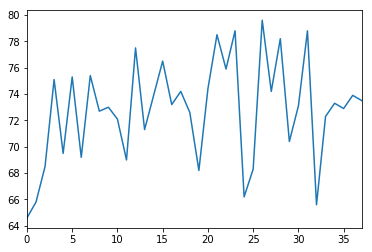

In [215]:
boroughs['Employment_rate_(%)_(2015)'].plot();

To create a plot that makes more sense for this data have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for all options. A histogram might work better. Go ahead and change the number of bins until you think the number of bins looks right:

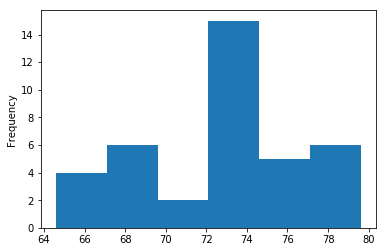

In [216]:
boroughs['Employment_rate_(%)_(2015)'].plot.hist(bins=6);

Change the size of the plot with `figsize`:

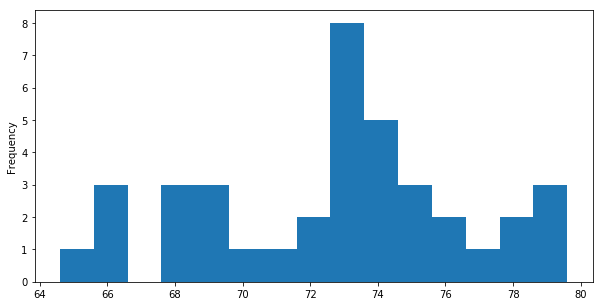

In [217]:
boroughs['Employment_rate_(%)_(2015)'].plot.hist(bins=15,figsize=(10,5));

You can select data as you learned earlier direclt in a plot command. The below plot shows only the mens jeans:

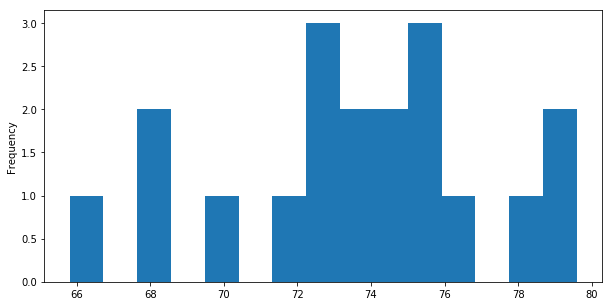

In [218]:
boroughs['Employment_rate_(%)_(2015)'][boroughs['Inner/_Outer_London']=='Outer London'].plot.hist(bins=15,figsize=(10,5));

To add the womens jeans, simply repeat the plot command with a different selection of the data:

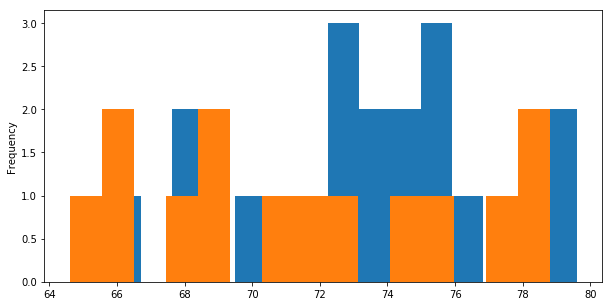

In [219]:
boroughs['Employment_rate_(%)_(2015)'][boroughs['Inner/_Outer_London']=='Outer London'].plot.hist(bins=15,figsize=(10,5));
boroughs['Employment_rate_(%)_(2015)'][boroughs['Inner/_Outer_London']=='Inner London'].plot.hist(bins=15,figsize=(10,5));

The above plot is difficult to read as the histograms overlap. You can fix this by changing the colours and making them transparant. To add a legend each histogram needs to be assigned to an object `ax` that is used to create a legend:

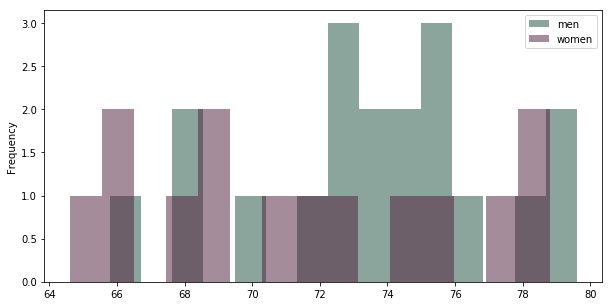

In [220]:
ax = boroughs['Employment_rate_(%)_(2015)'][boroughs['Inner/_Outer_London']=='Outer London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#1A4D3B');
ax = boroughs['Employment_rate_(%)_(2015)'][boroughs['Inner/_Outer_London']=='Inner London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#4D1A39');
ax.legend(['men','women']);

It is easy to change pretty much everything as in the below code. This was the ugliest I could come up with. Can you make it worse?

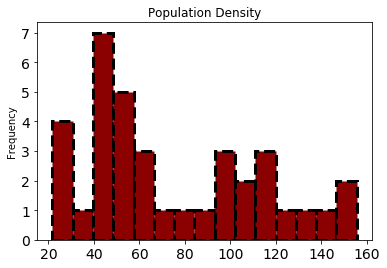

In [221]:
boroughs['Population_density_(per_hectare)_2017'].plot.hist(
    bins=15, 
    title="Population Density",
    legend=False,
    fontsize=14,
    grid=False,
    linestyle='--',
    edgecolor='black',
    color='darkred',
    linewidth=3);

You can use `groupby()` in combination with a bar plot to visualize the price by style:

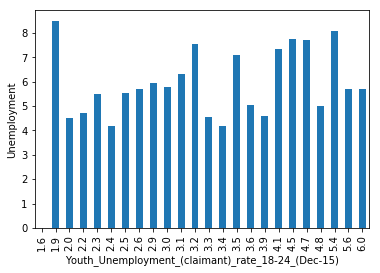

In [222]:
Unemployment = boroughs['Unemployment_rate_(2015)'].groupby(boroughs['Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)']).mean()
ax=Unemployment.plot.bar();
ax.set_ylabel('Unemployment');

## Seaborn

Seaborn is an easy to use visualisation package that works well with Pandas DataFrames. Below are a few examples, but have a look at the [documentation](https://seaborn.pydata.org/index.html) as there are many more plots you could make. 

In [223]:
import seaborn as sns

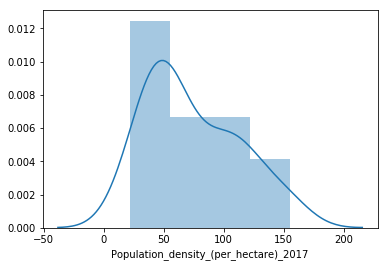

In [224]:
sns.distplot(boroughs['Population_density_(per_hectare)_2017'].dropna());

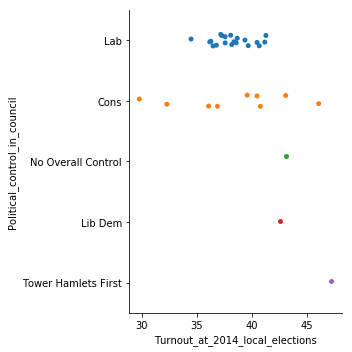

In [225]:
sns.catplot(x='Turnout_at_2014_local_elections', y='Political_control_in_council', data=boroughs);

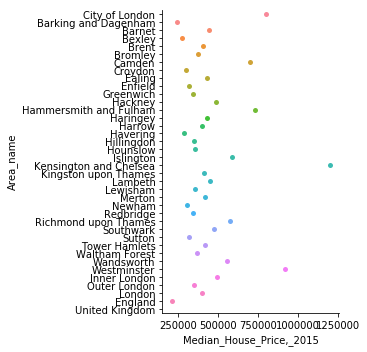

In [226]:
sns.catplot(x='Median_House_Price,_2015', y='Area_name', kind='swarm', data=boroughs, );

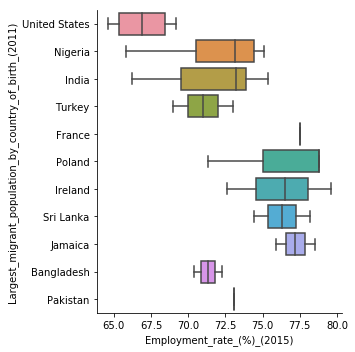

In [227]:
sns.catplot(x="Employment_rate_(%)_(2015)", y="Largest_migrant_population_by_country_of_birth_(2011)", kind="box", data=boroughs);

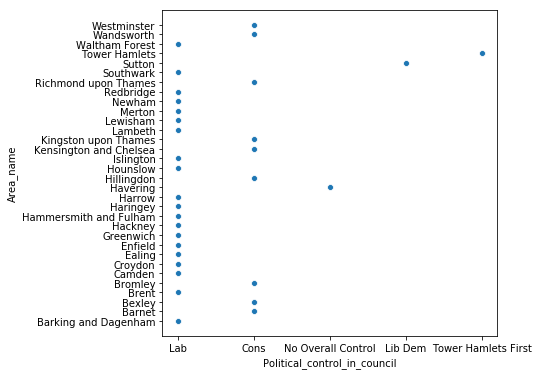

In [228]:
[fig, ax] = plt.subplots(1, figsize=(6,6))
ax=sns.scatterplot(y='Area_name', x='Political_control_in_council', data=boroughs, ax=ax);


<div class="alert alert-success">
 <b>EXERCISE</b>
 <ul>
  <li>Create two histograms that compare the Gross Annual pay for Male and Female Employees using `.plot.hist()`</li>
  <li>Create a bar plot comparing the median house prices for different Areas using a barplot</li>
  <li>Create a Scatter plot displaying the Percentage of Area that is Greenspace for each Area </li>
  <li>Create a box plot showing the Female employment rate amongst the Largest migrant population arrived during year 15-16 </li>
  <li>Explore the data further by creating more plots that can aswer qustions that you have about the dataset</li>
 </ul> 
   </div> 
   
 <ul></ul> 
 <ul></ul> 
 <ul></ul> 
 
 > *Tips*:
-  Tip: to add two histograms to one plot you can repeat `.plot()` in the same cell 
-  Tip: For a box plot in Seaborn, use `catplot` where kind = `box` 
-  To customise the size of your maps, use the example of `[fig, ax]` which customises the figsize for each map in other examples above 



Answer 1

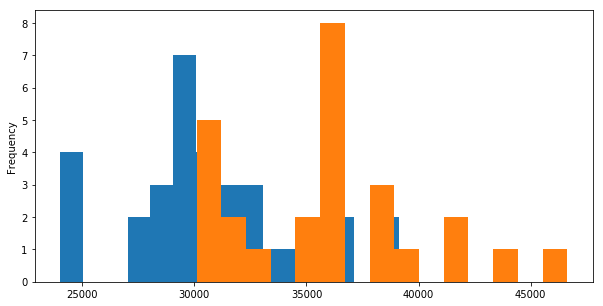

In [229]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer5.py
boroughs['Gross_Annual_Pay_-_Female_(2016)'].plot.hist(bins=15,figsize=(10,5));
boroughs['Gross_Annual_Pay_-_Male_(2016)'].plot.hist(bins=15,figsize=(10,5));



Answer 2

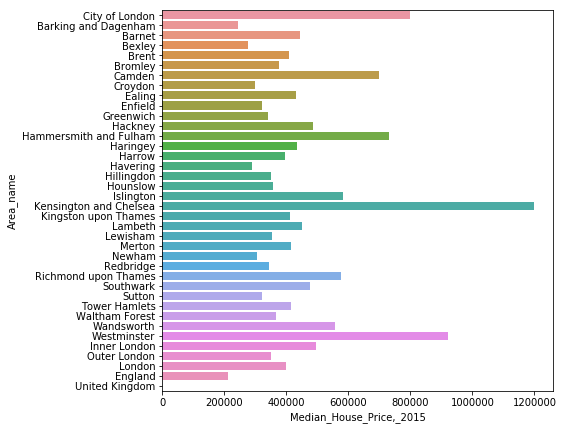

In [145]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer6.py
[fig, ax] = plt.subplots(1, figsize=(7,7))
sns.barplot(x="Median_House_Price,_2015", y="Area_name", data=boroughs, ax=ax);



Answer 3

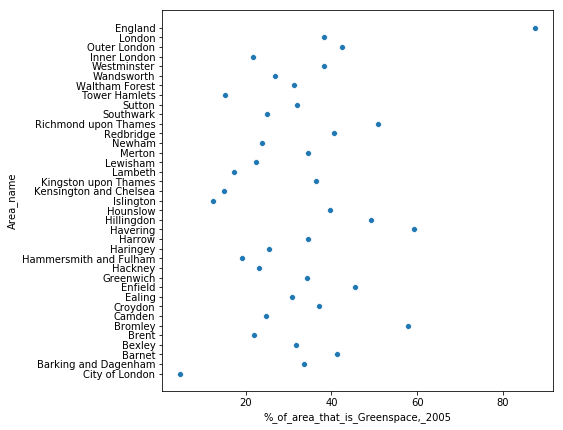

In [150]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer7.py
[fig, ax] = plt.subplots(1, figsize=(7,7))
ax=sns.scatterplot(y='Area_name', x='%_of_area_that_is_Greenspace,_2005', data=boroughs,ax=ax);


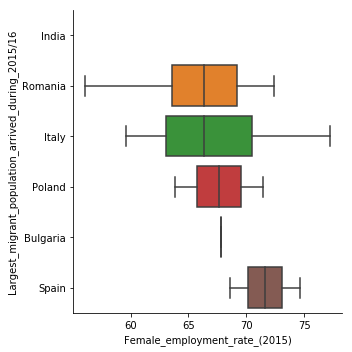

In [153]:
# %load https://raw.githubusercontent.com/IBMDeveloperUK/foss4g-geopandas/master/answers/pandas_answer8.py
sns.catplot(x="Female_employment_rate_(2015)", y="Largest_migrant_population_arrived_during_2015/16", kind="box", data=boroughs);


<a id="extra"></a>
# 4. Optional Excercises and further learning

If you finish early:

2. Try to create other plots. Have a look at the [Pandas plot examples](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) or the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) for inspiration.  
3. Or load one of your own datasets into a new notebook and play around with the data to practice what you have learned. You can use the free account you created today for your own projects as well! 
4. Have a look at these Pandas workshops and book: <br>
4.1. [Pandas workshop by Alexander Hensdorf](https://github.com/alanderex/pydata-pandas-workshop) <br>
4.2. [Pandas tutorial by Joris van den Bossche](https://github.com/jorisvandenbossche/pandas-tutorial) <br>
4.3. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) <br>

### Authors

Margriet Groenendijk is a Data & AI Developer Advocate for IBM. She develops and presents talks and workshops about data science and AI. She is active in the local developer communities through attending, presenting and organising meetups. She has a background in climate science where she explored large observational datasets of carbon uptake by forests during her PhD, and global scale weather and climate models as a postdoctoral fellow. 

Yamini Rao is a Developer Advocate for IBM. She compiles Developer scenarios, workshops and training material based on IBM Cloud technologies to demonstrate values. She also works as a community manager, collaborating with local developer communites to organise workshops and meetups. She has a background in computer science and has worked extensively as an Implementation Engineer for various IBM Analytical tools. 

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.